<a href="https://colab.research.google.com/github/p0lsol/programming_basics_ML/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

with open('stopwords.txt', 'r') as f:
  sw = f.read()

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
#чистим

import re

def clean(text, sw=sw):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  text = [word for word in text.split() if word not in sw]

  return ' '.join(text)


df["review"] = df["review"].astype(str).apply(lambda x: clean(x, sw))
df['review'].head(10)


,review
0,reviewers mentioned watching just oz episode y...
1,wonderful little production br br filming tech...
2,thought wonderful spend hot summer weekend sit...
3,basically family little boy jake thinks zombie...
4,petter matteis love money visually stunning fi...
5,alltime favorite movie story selflessness sacr...
6,sure resurrection dated seahunt series tech to...
7,show amazing fresh innovative idea first aired...
8,encouraged positive comments film looking forw...
9,original gut wrenching laughter will movie you...


In [5]:
texts = df['review'].values
labels = df['sentiment'].map({'positive': 1, 'negative': 0}).values

max_tokens = 10000
sequence_length = 250
vectorizer = TextVectorization(max_tokens=max_tokens, output_mode='int', output_sequence_length=sequence_length)
vectorizer.adapt(texts)
vectorized_texts = vectorizer(texts).numpy()



In [6]:

X_train, X_temp, y_train, y_temp = train_test_split(vectorized_texts, labels, test_size=0.3, random_state=50)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

print("train:", X_train.shape, y_train.shape)
print("val:", X_val.shape, y_val.shape)
print("test:", X_test.shape, y_test.shape)

train: (35000, 250) (35000,)
val: (7500, 250) (7500,)
test: (7500, 250) (7500,)


In [7]:
embedding_dim = 128
num_filters = 64
kernel_size = 6
dropout_rate = 0.5

model = Sequential([
    Embedding(input_dim=max_tokens, output_dim=embedding_dim),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=30)

Epoch 1/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 98s 82ms/step - accuracy: 0.7354 - loss: 0.4988 - val_accuracy: 0.8539 - val_loss: 0.3303
Epoch 2/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 91s 78ms/step - accuracy: 0.9281 - loss: 0.1958 - val_accuracy: 0.8684 - val_loss: 0.3141
Epoch 3/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 0.9824 - loss: 0.0627 - val_accuracy: 0.8581 - val_loss: 0.4354
Epoch 4/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 140s 78ms/step - accuracy: 0.9945 - loss: 0.0194 - val_accuracy: 0.8644 - val_loss: 0.5429
Epoch 5/5
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.8641 - val_loss: 0.7029


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.8692 - loss: 0.6500


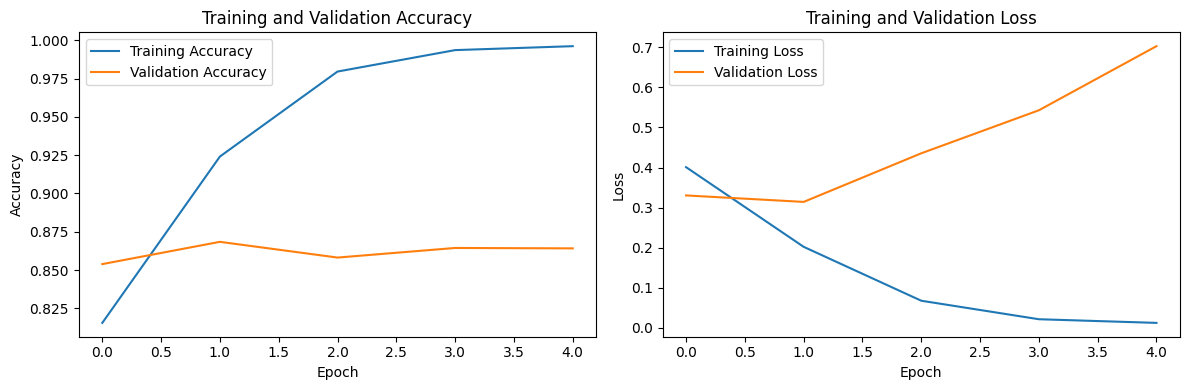

In [12]:
# Отрисовка графика прогресса обучения
plt.figure(figsize=(12, 4))

# Отрисовка аккуратности (точности) модели
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Отрисовка значений функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


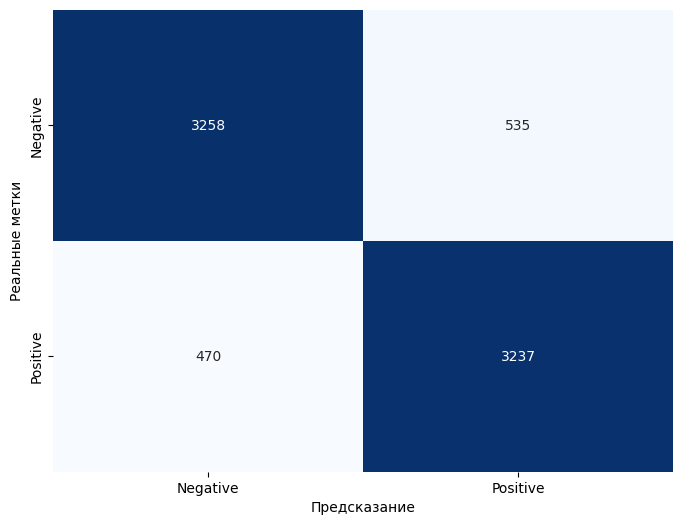

In [15]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Предсказание')
plt.ylabel('Реальные метки')
plt.show()

In [8]:
#поменяем количество эпох, может быть, если потренировать подольше, то результат выйдет лучше...
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=8,
    batch_size=30)


Epoch 1/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 95s 80ms/step - accuracy: 0.7358 - loss: 0.4939 - val_accuracy: 0.8693 - val_loss: 0.3088
Epoch 2/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 139s 77ms/step - accuracy: 0.9310 - loss: 0.1943 - val_accuracy: 0.8697 - val_loss: 0.3177
Epoch 3/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - accuracy: 0.9825 - loss: 0.0612 - val_accuracy: 0.8681 - val_loss: 0.4184
Epoch 4/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.9973 - loss: 0.0137 - val_accuracy: 0.8684 - val_loss: 0.6106
Epoch 5/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 0.8683 - val_loss: 0.6046
Epoch 6/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.9954 - loss: 0.0136 - val_accuracy: 0.8648 - val_loss: 0.6438
Epoch 7/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.8628 - val_loss: 0.7474
Epoch 8/8
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 147s 83ms/step - accuracy: 0.9982 - 

In [11]:
#кажется, переобучилась? в любом случае, лучше собо не стало...
model.save('my_model.keras')